In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import torch.nn.functional as F
import numpy as np

# torch.manual_seed(1)

EPOCH = 2
LR = 0.001
DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(root='./mnist/', train=True, transform=torchvision.transforms.ToTensor(),
                                        download=DOWNLOAD_MNIST, )
test_data = torchvision.datasets.MNIST(root='./mnist/', train=False)


train_x = torch.unsqueeze(train_data.data, dim=1).type(torch.FloatTensor) / 255.
train_y = train_data.targets
print(train_x.shape)

test_x = torch.unsqueeze(test_data.data, dim=1).type(torch.FloatTensor)[:2000] / 255.  # Tensor on GPU
test_y = test_data.targets[:2000]
# warning
# train_x = torch.unsqueeze(train_data.train_data, dim=1).type(torch.FloatTensor) / 255.
# train_y = train_data.train_labels
# print(train_x.shape)

# test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000] / 255.  # Tensor on GPU
# test_y = test_data.test_labels[:2000]


torch.Size([60000, 1, 28, 28])


/Users/kancheng/opt/anaconda3/envs/pytorch-init/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1631631227379/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [2]:
test_x.shape

torch.Size([2000, 1, 28, 28])

In [3]:
import matplotlib.pyplot as plt

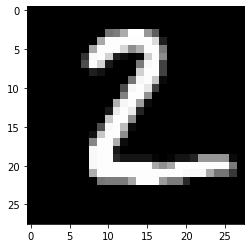

In [4]:
plt.imshow(test_x[1,0,:,:].numpy(), 'gray')

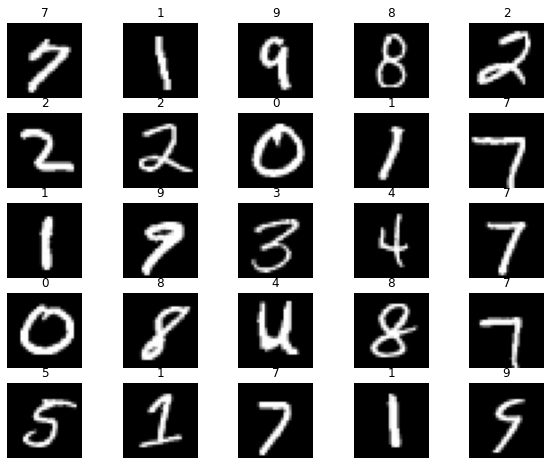

In [5]:
# 繪製多個 train_data
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
test_y[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [7]:
class FC(nn.Module):
    def __init__(self):
        super(FC, self).__init__()
        # FC3
        #self.fc1 = nn.Linear(784, 256)
        #self.fc2 = nn.Linear(256, 10)
        #self.fc3 = nn.Linear(10, 10)

        # FC4
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.fc4 = nn.Linear(10, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        output = x
        return output
fc = FC()
optimizer = torch.optim.Adam(fc.parameters(), lr=LR)
#loss_func = nn.MSELoss()
loss_func = nn.CrossEntropyLoss()

data_size = 50000
batch_size = 50
for epoch in range(EPOCH):
    random_indx = np.random.permutation(data_size)
    for batch_i in range(data_size // batch_size):
        indx = random_indx[batch_i * batch_size:(batch_i + 1) * batch_size]

        b_x = train_x[indx, :]
        b_y = train_y[indx]
#         print(b_x.shape)
#         print(b_y.shape)
        output = fc(b_x)
        loss = loss_func(output, b_y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch_i % 50 == 0:
            test_output = fc(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            # pred_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.cpu().numpy(), '| test accuracy: %.3f' % accuracy)

test_output = fc(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')


Epoch:  0 | train loss: 2.3079 | test accuracy: 0.105
Epoch:  0 | train loss: 1.2954 | test accuracy: 0.518
Epoch:  0 | train loss: 0.8506 | test accuracy: 0.718
Epoch:  0 | train loss: 0.4927 | test accuracy: 0.789
Epoch:  0 | train loss: 0.5421 | test accuracy: 0.832
Epoch:  0 | train loss: 0.3407 | test accuracy: 0.846
Epoch:  0 | train loss: 0.5657 | test accuracy: 0.848
Epoch:  0 | train loss: 0.3150 | test accuracy: 0.881
Epoch:  0 | train loss: 0.3149 | test accuracy: 0.882
Epoch:  0 | train loss: 0.7052 | test accuracy: 0.892
Epoch:  0 | train loss: 0.2937 | test accuracy: 0.905
Epoch:  0 | train loss: 0.3780 | test accuracy: 0.909
Epoch:  0 | train loss: 0.1319 | test accuracy: 0.919
Epoch:  0 | train loss: 0.2125 | test accuracy: 0.919
Epoch:  0 | train loss: 0.4903 | test accuracy: 0.915
Epoch:  0 | train loss: 0.0368 | test accuracy: 0.925
Epoch:  0 | train loss: 0.2886 | test accuracy: 0.925
Epoch:  0 | train loss: 0.3133 | test accuracy: 0.930
Epoch:  0 | train loss: 0.13

In [8]:
test_output = fc(test_x[:1])
pred_y = torch.max(test_output, 1)[1].data.squeeze()  # move the computation in GPU

print(pred_y, 'prediction number')
print(test_y[:1], 'real number')

tensor(7) prediction number
tensor([7]) real number


In [9]:
test_output

tensor([[0.0000, 0.0000, 1.7088, 5.4762, 0.0000, 0.0000, 0.0000, 8.9639, 0.2636,
         0.5689]], grad_fn=<ReluBackward0>)

In [10]:
test_x[:1].shape

torch.Size([1, 1, 28, 28])

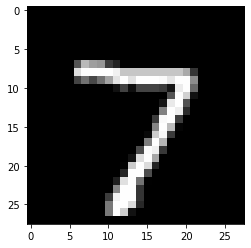

In [11]:
plt.imshow(test_x[:1].numpy().squeeze(), 'gray')

In [12]:
import torch
torch.eye(10)
0, 1, 2, ..., 9 

(0, 1, 2, Ellipsis, 9)